<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_VisualizacionDeDatos/blob/main/VDD_Diabetes_Carolina_Herrera_Azolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: Diseño de gráficos para datos tabulares y distribuciones con Python


1.Dos scatterplots, los cuales comparan la relación entre glucosa e insulina y glucosa con presión arterial. Ambos scatterplots deben mostrar si el dato específico tiene o no diabetes.

In [91]:
# Importamos  el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Importamos la librerías
import pandas as pd
import seaborn as sns
import numpy as np

In [92]:
# Carga del archivo
df = pd.read_csv("Diabetes_Tarea2.csv")

# Revisamos los primeros 5 datos del archivo
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


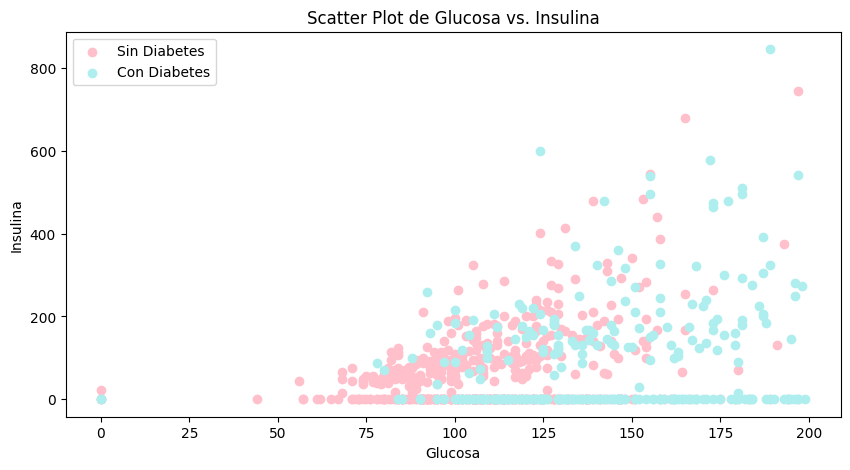

In [27]:
# Separamos las personas según si tiene o no diabetes (Atributo: outcome)
conDiabetes = df[df['Outcome'] == 1]
sinDiabetes = df[df['Outcome'] == 0]

# Creamos Gráfico Scatter Plot de Glucosa vs. Insulina

#Definimos dimensiones del gráfico
plt.figure(figsize=(10, 5))

# Indicamos que datos necesitamos de los dos grupos para hacer el gráfico (Glucosa e insulina)
plt.scatter(sinDiabetes['Glucose'], sinDiabetes['Insulin'], color='pink', label='Sin Diabetes')
plt.scatter(conDiabetes['Glucose'], conDiabetes['Insulin'], color='paleturquoise', label='Con Diabetes')

# Añadimos los textos al gráfico
plt.title('Scatter Plot de Glucosa vs. Insulina')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.legend()

# Exponemos
plt.show()


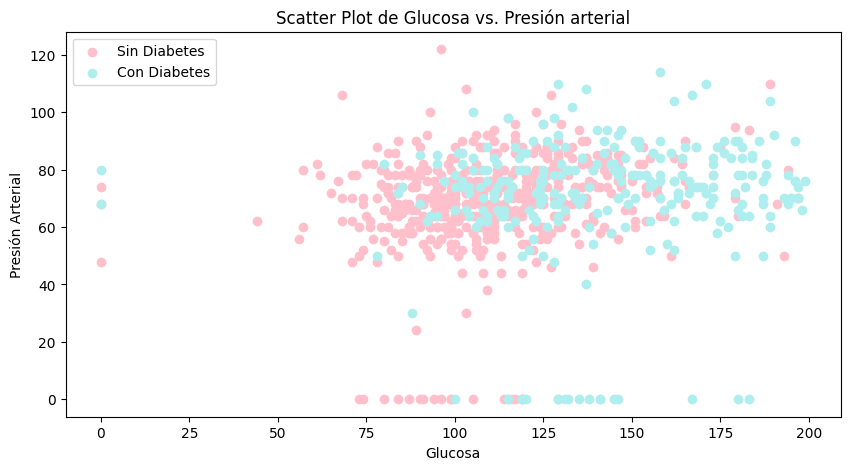

In [28]:
# # Creamos Gráfico Scatter Plot de Glucosa y Presión Arterial

#Definimos dimensiones del gráfico
plt.figure(figsize=(10, 5))

# Indicamos que datos necesitamos de los dos grupos para hacer el gráfico (Glucosa y Presión arterial)

plt.scatter(sinDiabetes['Glucose'], sinDiabetes['BloodPressure'], color='pink', label='Sin Diabetes')
plt.scatter(Diabetes['Glucose'], Diabetes['BloodPressure'], color='paleturquoise', label='Con Diabetes')

# Añadimos los textos al gráfico
plt.title('Scatter Plot de Glucosa vs. Presión arterial')
plt.xlabel('Glucosa')
plt.ylabel('Presión Arterial')
plt.legend()

# Exponemos
plt.show()

2. Dos diagramas de caja, donde se separan los pacientes en cuartiles según su edad y según si tienen o no diabetes, midiendo su nivel de glucosa y BMI (IMC).

In [32]:
# Creamos los cuartiles
df['Age Quartile'] = pd.qcut(df['Age'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

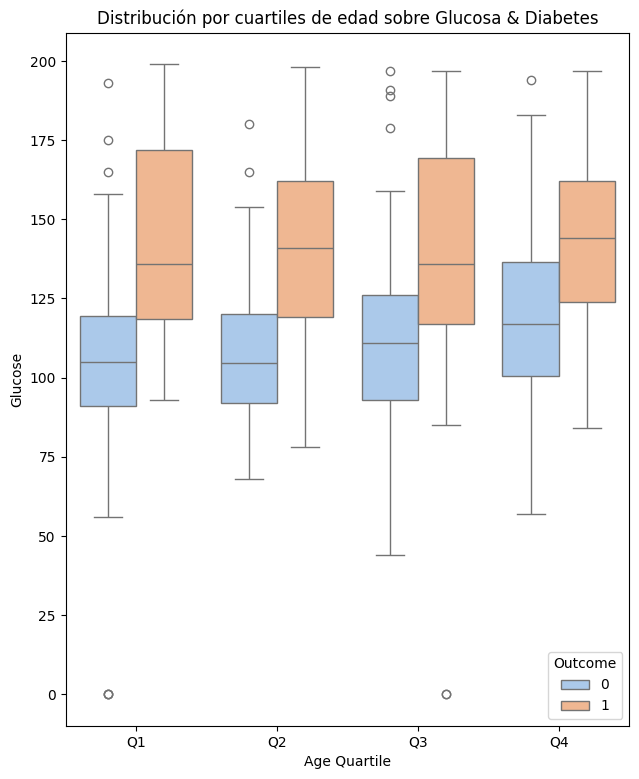

In [48]:
# Gráfico Plot de Glucosa vs diabetes en cuartiles según edad
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age Quartile', y='Glucose', hue='Outcome', data=df, palette='pastel')
plt.title('Distribución por cuartiles de edad sobre Glucosa & Diabetes')

# Exponemos
plt.show()


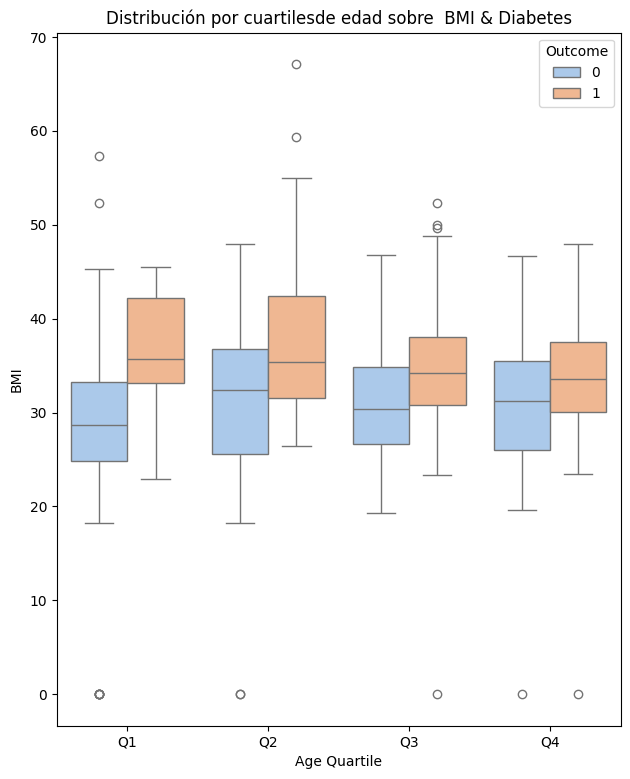

In [47]:
# Gráfico plot de BMI vs diables en cuartiles según edad
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.boxplot(x='Age Quartile', y='BMI', hue='Outcome', data=df, palette='pastel')
plt.title('Distribución por cuartilesde edad sobre  BMI & Diabetes')

# Exponemos
plt.show()

3. Dos diagramas de violín con las mismas separaciones anteriores, esta vez

mostrando los datos de insulina y espesor de la piel.


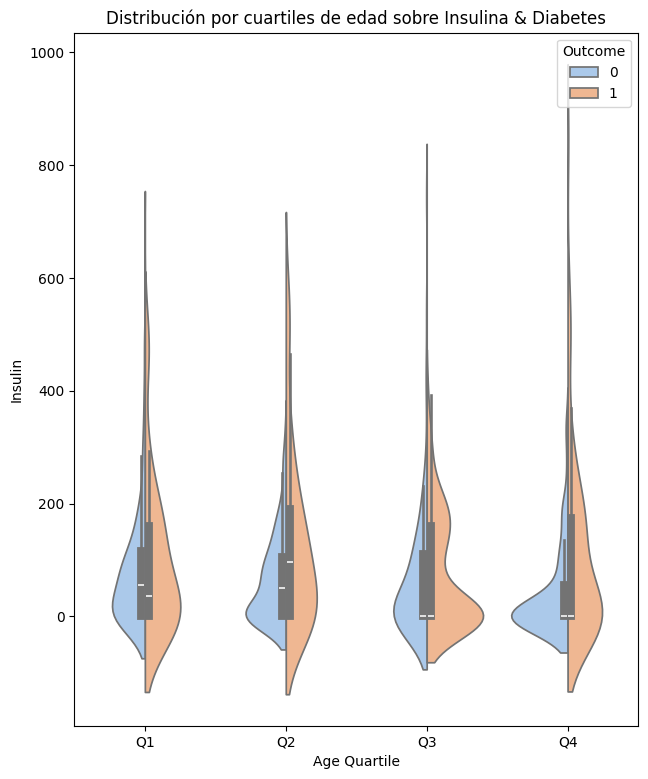

In [44]:
# Diagrama de violín para Insulina vs. diabetes con respecto a cuartiles de edad

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
sns.violinplot(x='Age Quartile', y='Insulin', hue='Outcome', data=df, split=True, palette='pastel')
plt.title('Distribución por cuartiles de edad sobre Insulina & Diabetes')
plt.show()

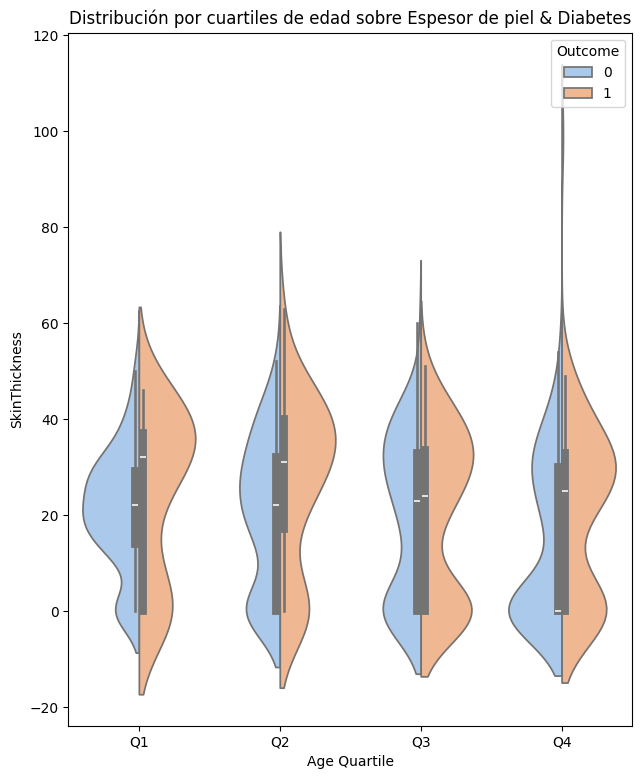

In [46]:
# Diagrama de violín para Espesor de piel vs. diabetes con respecto a cuartiles de edad

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.violinplot(x='Age Quartile', y='SkinThickness', hue='Outcome', data=df, split=True, palette='pastel')
plt.title('Distribución por cuartiles de edad sobre Espesor de piel & Diabetes')
plt.show()

4. Un diagrama de torta, donde se separan a los pacientes en grupos de 10 años (21 a 30 años, 31 a 40 años, etc…) y se muestra la cantidad de pacientes en cada grupo.

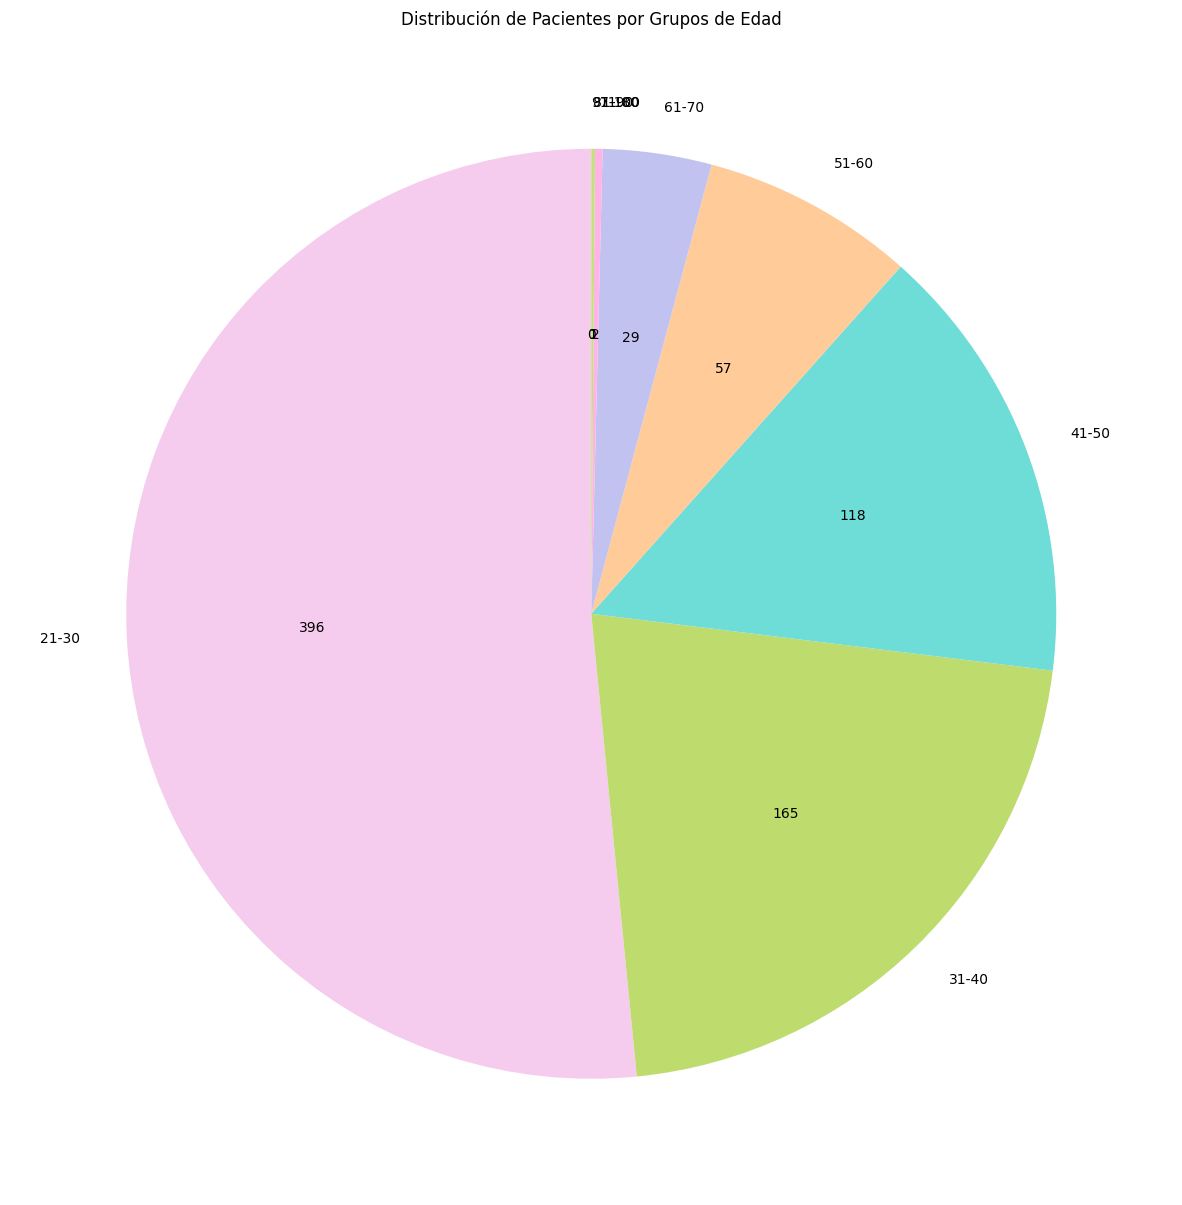

In [66]:
#Creamos los grupos, comenzando en 20 hasta el 101, separados por 10 años
bins = list(range(20, 101, 10))

#Definimos las etiquetas de separación de rangos
labels = [f'{i+1}-{i+10}' for i in bins[:-1]]

# Creamos una nueva columna para los grupos de edad
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar la cantidad de pacientes en cada grupo de edad
age_group_counts = df['Age Group'].value_counts().sort_index()

# Creamos un array con los colores
colors = ['#F5CCED','#BEDC6E','#6EDCD7','#ffcc99','#c2c2f0','#ffb3e6', '#c4e17f', '#0633EB']

# Crear el diagrama de torta mostrando el número absoluto en lugar del porcentaje
plt.figure(figsize=(15, 25))
plt.pie(age_group_counts, labels=age_group_counts.index, colors=colors,
        autopct=lambda p: '{:.0f}'.format(p * sum(age_group_counts) / 100), startangle=90)
plt.title('Distribución de Pacientes por Grupos de Edad')
plt.show()


5. Un gráfico de múltiples ejes mostrando todos los datos, separando los casos con y sin diabetes.


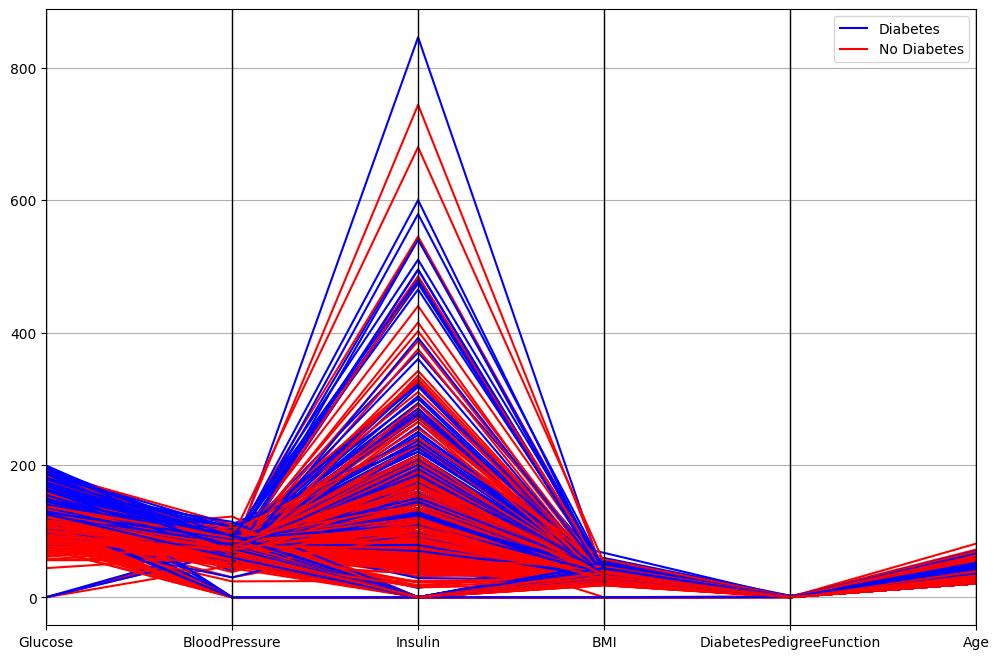

In [93]:
# Limpiamos datos, donde outcome es NAN
df = df.dropna(subset=['Outcome'])

from pandas.plotting import parallel_coordinates

df['Outcome'] = df['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Creamos el gráfico de múltiples ejes
plt.figure(figsize=(12, 8))
parallel_coordinates(df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']], 'Outcome', color=['blue', 'red'])
plt.show()
